##IMPORT LIBRARY

In [ ]:
pip install transformers

In [ ]:
#general purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from tensorflow import keras
import tensorflow as tf

#metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## LOAD DATASET
Dataset is scrapped from X https://x.com/home

In [ ]:
df = pd.read_excel('/content/unity_labeled.xls')

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,label
0,1220000000000000000,Mon Feb 03 10:12:57 +0000 2020,2759,stop klitih lapis masyarakat yogyakarta satu l...,1.220000e+18,https://pbs.twimg.com/ext_tw_video_thumb/12242...,NaN,in,NaN,79.0,79.0,1386.0,https://twitter.com/Mbendol52768653/status/122...,1.210000e+18,Mbendol52768653,rawan
1,1700000000000000000,Wed Sep 13 02:38:26 +0000 2023,3704,the center of education klitih yogyakarta,1.700000e+18,https://pbs.twimg.com/media/F531qX0bsAAyz6K.jpg,NaN,in,indonesia,294.0,75.0,728.0,https://twitter.com/weebsalter/status/17017873...,1.220000e+18,weebsalter,rawan
2,1380000000000000000,Wed Apr 21 04:30:41 +0000 2021,1685,oke kemarin akun ig sangar mengatasnamakan gan...,1.380000e+18,https://pbs.twimg.com/media/EzeJL_bVEAcwTpk.jpg,NaN,in,"Yogyakarta, Indonesia",97.0,135.0,624.0,https://twitter.com/txtfromjogja/status/138472...,1.360000e+18,txtfromjogja,rawan
3,1510000000000000000,Tue Apr 05 05:27:14 +0000 2022,7286,minton nemu dokumenter pendek judul klitih war...,1.510000e+18,https://pbs.twimg.com/media/FPjo-rnaQAA1hCH.jpg,NaN,in,Indonesia,97.0,47.0,2042.0,https://twitter.com/HabisNontonFilm/status/151...,1.080000e+18,HabisNontonFilm,rawan
4,1620000000000000000,Sat Feb 11 01:47:29 +0000 2023,86,geng kondang yogyakarta qzruh joxzin akar klit...,1.620000e+18,NaN,NaN,in,Kebumen,8.0,27.0,23.0,https://twitter.com/widodogroho/status/1624223...,1.440265e+08,widodogroho,rawan


In [ ]:
print(df['label'].value_counts())

label
rawan           842
kurang rawan     55
Name: count, dtype: int64


In [ ]:
df = df[['full_text','label']]

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
token_lens = []

for txt in df['full_text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 107


## BALANCING DATA USING RANDOM OVER SAMPLING
To avoid models more likely to study certain classes (unbalanced data). Then Data Balancing is needed, one of which is by using Random Over Sampling.

In [ ]:
ros = RandomOverSampler()
x, y = ros.fit_resample(np.array(df['full_text']).reshape(-1, 1), np.array(df['label']).reshape(-1, 1));
os = pd.DataFrame(list(zip([x[0] for x in x], y)), columns = ['full_text', 'label']);

os['label'].value_counts()

label
rawan           842
kurang rawan    842
Name: count, dtype: int64

In [ ]:
x, y = os['full_text'].values, os['label'].values
x_train, x_valid, y_train, y_valid = train_test_split(x, y, stratify = y, random_state = 40, test_size = 0.2, shuffle = True)

In [ ]:
# Jumlah data latih
num_train = len(x_train)
print("Jumlah data latih:", num_train)

# Jumlah data uji
num_test = len(x_valid)
print("Jumlah data uji:", num_test)

Jumlah data latih: 1347
Jumlah data uji: 337


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)

{'kurang rawan': 673, 'rawan': 674}


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)

## TOKENIZER USING BERT-BASE-UNCASED
The tokenized words are converted into a vector where BERT-base-uncased has a glossary of 30,522 words.

In [ ]:
MAX_LEN=128

def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(x_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(x_valid, MAX_LEN)

## BUILDING MODEL BERT
The BERT model is built with a Deep Learning structure, namely Keras. And the output layer is adjusted to the class to be classified.

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[1]
    output = tf.keras.layers.Dense(1, activation="sigmoid")(embeddings)
    model_out = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model_out.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model_out

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=42)

Epoch 1/5
33/33 [==============================] - 130s 1s/step - loss: 0.1788 - accuracy: 0.9206 - val_loss: 0.0214 - val_accuracy: 0.9970
Epoch 2/5
33/33 [==============================] - 37s 1s/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.0185 - val_accuracy: 0.9970
Epoch 3/5
33/33 [==============================] - 39s 1s/step - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.0193 - val_accuracy: 0.9970
Epoch 4/5
33/33 [==============================] - 36s 1s/step - loss: 0.0058 - accuracy: 0.9993 - val_loss: 0.0193 - val_accuracy: 0.9970
Epoch 5/5
33/33 [==============================] - 39s 1s/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0214 - val_accuracy: 0.9970


## METRICS EVALUATION MODEL BERT

In [ ]:
train_loss, train_accuracy = model.evaluate([train_input_ids,train_attention_masks], y_train)

print(f'Train Loss: {train_loss}')
print(f'Train Accuracy: {train_accuracy}')

43/43 [==============================] - 12s 286ms/step - loss: 0.0083 - accuracy: 0.9985
Train Loss: 0.008302819915115833
Train Accuracy: 0.998515248298645


In [ ]:
val_loss, val_accuracy = model.evaluate([val_input_ids, val_attention_masks], y_valid)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

11/11 [==============================] - 3s 288ms/step - loss: 0.0214 - accuracy: 0.9970
Validation Loss: 0.0213931817561388
Validation Accuracy: 0.997032642364502


In [ ]:
val_predictions = model.predict([val_input_ids, val_attention_masks])

# Extract the predicted class labels (assuming sigmoid activation)
val_pred_labels = (val_predictions > 0.5).astype(int)  # Threshold for binary classification

# Calculate recall, precision, and F1-score
recall = recall_score(y_valid, val_pred_labels)
precision = precision_score(y_valid, val_pred_labels)
f1 = f1_score(y_valid, val_pred_labels)

print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

11/11 [==============================] - 13s 276ms/step
Recall: 0.9940476190476191
Precision: 1.0
F1-Score: 0.9970149253731343


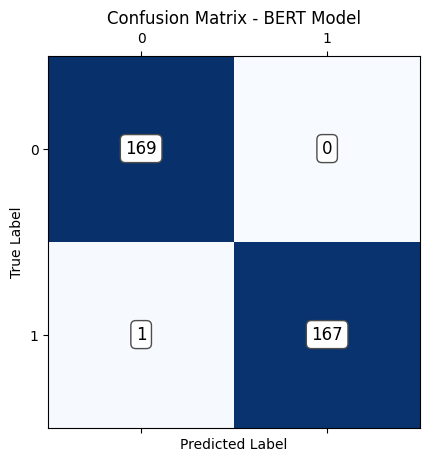

In [ ]:
cm = confusion_matrix(y_valid, val_pred_labels)
plt.matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - BERT Model')
plt.show()

## TESTING MODEL

In [ ]:
# Sentiment analysis function
def analyze_sentiment(text):
    input_ids, attention_masks = tokenize([text])
    prediction = model.predict([input_ids, attention_masks])[0][0]
    if prediction >= 0.5:
        return "Rawan"
    else:
        return "Tidak Rawan"

# Example usage
user_input = input("Enter your text: ")
sentiment = analyze_sentiment(user_input)
print("Sentiment:", sentiment)

Enter your text: Banyak banget klitih di yogyakarta nih
1/1 [==============================] - 0s 56ms/step
Sentiment: Rawan


In [ ]:
# Sentiment analysis function
def analyze_sentiment(text):
    input_ids, attention_masks = tokenize([text])
    prediction = model.predict([input_ids, attention_masks])[0][0]
    if prediction >= 0.5:
        return "Rawan"
    else:
        return "Tidak Rawan"

# Example usage
user_input = input("Enter your text: ")
sentiment = analyze_sentiment(user_input)
print("Sentiment:", sentiment)

Enter your text: Alhamdulillah udah mulai aman nih yogyakarta
1/1 [==============================] - 0s 57ms/step
Sentiment: Tidak Rawan
